# Shiyu and Jihui's Jupyter Notebook for Project 1. 

The purpose of this project is to organize the original dataset and perform an analysis of comparing the difference between the property value for Asian and Not Asian individuals. 

The original dataset is a sample of 15,120 mortgage applications made in the United States in 2018. If you want to know the meaning of each column, they are available [on this website](https://ffiec.cfpb.gov/documentation/2018/lar-data-fields/#lei).


At first, we import all necessary python packages for this project. To make the plot visually clear, we adjust the plot size to 12*9 inches. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [12,9]

We load the original dataset and make the mortgage identification number as the index for the dataset. We display the first five rows with **ALL** columns in this dataset. 

In [3]:
df = pd.read_csv('project-1-dataset-15120-rows.csv', index_col=0)
pd.options.display.max_columns = None
df.head()

,Unnamed: 0.1,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
80545,80545,2018,5493002QI2ILHHZH8D20,31084,CA,6037.0,6.037603e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Joint,3,0,2,1,1,1,2,2,2,545000,80.0,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,2,2,2,2,675000,1,1,3,5,1,NaN,162.0,50%-60%,1,1,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,2.0,22.0,NaN,NaN,NaN,2.0,22.0,NaN,NaN,NaN,2,2,1,2,2,2,65-74,55-64,Yes,Yes,1,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,7029,96.76,69300,65,885,1363,51
62888,62888,2018,549300ALNLUNS3Y53T24,44060,WA,53063.0,5.306301e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,3,2,1,32,1,2,2,2,115000,39.0,5.125,0.689,2,3367.0,NaN,1758.0,NaN,NaN,360,NaN,NaN,2,2,2,2,285000,1,1,3,5,1,NaN,25.0,44,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,2,5,2,4,65-74,9999,Yes,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7568,11.19,64000,138,2002,2338,22
140260,140260,2018,549300PUSSF737Y6XW86,12060,GA,13223.0,1.322312e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,3,2,1,4,1,2,2,2,105000,37.594,4.625,0.148,2,1577.5,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,265000,1,1,3,5,1,NaN,33.0,44,3,9,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,1,2,2,2,65-74,65-74,Yes,Yes,1,1,2,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11924,26.72,74400,125,3082,3775,13
108456,108456,2018,JJKC32MCHWDI71265Z06,17900,SC,45079.0,4.507901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,0,2,1,1,1,2,2,2,185000,39.98,3.875,0.214,2,5592.75,NaN,1445.0,NaN,235.14,372,NaN,120,2,1,2,2,465000,1,1,3,5,1,NaN,39.0,42,1,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,65-74,9999,Yes,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6860,53.85,68800,128,1815,2465,13
82467,82467,2018,5493002UNUIL8WHZAD63,31140,KY,21185.0,2.118503e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,

For this project, we will be only using the following 15 columns. Therefore, we drop all other irrelavent columns. 

In [4]:
df = df[['derived_loan_product_type','loan_purpose','open_end_line_of_credit','occupancy_type','interest_rate','state_code','loan_type','reverse_mortgage','business_or_commercial_purpose','total_units','property_value','tract_minority_population_percent','derived_sex', 'derived_race','applicant_age']]
df.head()

,derived_loan_product_type,loan_purpose,open_end_line_of_credit,occupancy_type,interest_rate,state_code,loan_type,reverse_mortgage,business_or_commercial_purpose,total_units,property_value,tract_minority_population_percent,derived_sex,derived_race,applicant_age
80545,Conventional:First Lien,1,2,1,NaN,CA,1,2,2,1,675000,96.76,Joint,Asian,65-74
62888,Conventional:First Lien,32,2,1,5.125,WA,1,2,2,1,285000,11.19,Female,White,65-74
140260,Conventional:First Lien,4,2,1,4.625,GA,1,2,2,1,265000,26.72,Joint,White,65-74
108456,Conventional:First Lien,1,2,1,3.875,SC,1,2,2,1,465000,53.85,Male,White,65-74
82467,Conventional:First Lien,31,1111,1,Exempt,KY,1,1111,1111,1,Exempt,6.42,Joint,White,35-44


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 80545 to 100047
Data columns (total 15 columns):
derived_loan_product_type            15120 non-null object
loan_purpose                         15120 non-null int64
open_end_line_of_credit              15120 non-null int64
occupancy_type                       15120 non-null int64
interest_rate                        10061 non-null object
state_code                           14929 non-null object
loan_type                            15120 non-null int64
reverse_mortgage                     15120 non-null int64
business_or_commercial_purpose       15120 non-null int64
total_units                          15120 non-null object
property_value                       12424 non-null object
tract_minority_population_percent    15120 non-null float64
derived_sex                          15120 non-null object
derived_race                         15120 non-null object
applicant_age                        15120 non-null object
dtypes

We found out that the "derived_loan_product_type" column contains two information, *Loan Type* and *Lien Status*. Since there is a "loan type" column, we drop the loan type inforamtion from the "derived_loan_product_type", leaving only the useful *Lien status*. We define a new function to only get the lien status from the text. Lastly, we assign the data to categorical type.  

In [6]:
def get_status ( text ):
    if type(text) == str:
        return text.split(':')[1]

df['derived_loan_product_type'] = df['derived_loan_product_type'].apply( get_status )
df['derived_loan_product_type'] = df['derived_loan_product_type'].astype("category")
df.head()

,derived_loan_product_type,loan_purpose,open_end_line_of_credit,occupancy_type,interest_rate,state_code,loan_type,reverse_mortgage,business_or_commercial_purpose,total_units,property_value,tract_minority_population_percent,derived_sex,derived_race,applicant_age
80545,First Lien,1,2,1,NaN,CA,1,2,2,1,675000,96.76,Joint,Asian,65-74
62888,First Lien,32,2,1,5.125,WA,1,2,2,1,285000,11.19,Female,White,65-74
140260,First Lien,4,2,1,4.625,GA,1,2,2,1,265000,26.72,Joint,White,65-74
108456,First Lien,1,2,1,3.875,SC,1,2,2,1,465000,53.85,Male,White,65-74
82467,First Lien,31,1111,1,Exempt,KY,1,1111,1111,1,Exempt,6.42,Joint,White,35-44


Some of the data is not in the right type. Based on the original dataset, we change the type to categorical. need more detail. 

For the columns with numerical varing values -- "interest rate" and "property value", we drop the rows with "exempt" and change the data type to float. 

In [7]:
df['loan_purpose'] = df['loan_purpose'].astype( "category" )
df['loan_type'] = df['loan_type'].astype( "category" )
df['open_end_line_of_credit'] = df['open_end_line_of_credit'].astype( "category" )
df['occupancy_type'] = df['occupancy_type'].astype( "category" )
df['reverse_mortgage'] = df['reverse_mortgage'].astype( "category" )
df['business_or_commercial_purpose'] = df['business_or_commercial_purpose'].astype( "category" )
df['derived_sex'] = df['derived_sex'].astype( "category" )
df['derived_race'] = df['derived_race'].astype( "category" )
df['applicant_age'] = df['applicant_age'].astype( "category" )
df['derived_sex'] = df['derived_sex'].astype( "category" )
df['total_units'] = df['total_units'].astype( "category" )
df.drop(df[df['interest_rate']== "Exempt"].index, inplace = True)
df['interest_rate'] = df['interest_rate'].astype( float )
df.drop(df[df['property_value']== "Exempt"].index, inplace = True)
df['property_value'] = df['property_value'].astype( float )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14717 entries, 80545 to 100047
Data columns (total 15 columns):
derived_loan_product_type            14717 non-null category
loan_purpose                         14717 non-null category
open_end_line_of_credit              14717 non-null category
occupancy_type                       14717 non-null category
interest_rate                        9660 non-null float64
state_code                           14537 non-null object
loan_type                            14717 non-null category
reverse_mortgage                     14717 non-null category
business_or_commercial_purpose       14717 non-null category
total_units                          14717 non-null category
property_value                       12022 non-null float64
tract_minority_population_percent    14717 non-null float64
derived_sex                          14717 non-null category
derived_race                         14717 non-null category
applicant_age                        1

This project focuses on the ordinary home mortgages, so we drop any rows that don’t satisfy the requirements for a ordinary home mortgage. 

In [9]:
df.drop(df[df['reverse_mortgage']==1].index, inplace = True)
df.drop(df[df['reverse_mortgage']==1111].index, inplace = True)
df.drop(df[df['loan_type']!=1].index, inplace = True)
df.drop(df[df['derived_loan_product_type']=="Subordinate Lien"].index, inplace = True)
df.drop(df[df['loan_purpose']!=1].index, inplace = True)
df.drop(df[df['open_end_line_of_credit']==1].index, inplace = True)
df.drop(df[df['open_end_line_of_credit']==1111].index, inplace = True)
df.drop(df[df['business_or_commercial_purpose']==1].index, inplace = True)
df.drop(df[df['business_or_commercial_purpose']==1111].index, inplace = True)
df.drop(df[df['occupancy_type']!=1].index, inplace = True)

In [10]:
df.drop(df[df['total_units']=="5-24"].index, inplace = True)
df.drop(df[df['total_units']=="25-49"].index, inplace = True)
df.drop(df[df['total_units']=="50-99"].index, inplace = True)
df.drop(df[df['total_units']=="100-149"].index, inplace = True)
df.drop(df[df['total_units']==">149"].index, inplace = True)

The project will ask some questions about the political climate of the state in which the mortgage took place. So, we add a new column to the dataset, storing the data that classifies the states as either *“Strong Blue”* (meaning they voted for Clinton over Trump by over 10 points in 2016), *“Strong Red”* (meaning Trump over Clinton by over 10 points), or *“Neither”* (meaning everything else). 

We first create two lists of data, one for blue states and the other for red states. Then, we create an empty list in order to store the new data about political climate, and run a for loop to classify the states and adds to the new column the political climate of the state. Lastly, we change the type of the data in the new column to categorical. 

In [11]:
Blue_state = ["VT","CT","DC","DE","IL","MA","MD","NJ","RI","NY","CA","HI","OR","WA"]
Red_state = ["IN","KY","SC","WV","AL","MO","MS","OK","TN","AR","KS","LA","ND","NE","SD","WY","MT","UT","ID","AK"]
clim = []
for row in df['state_code']:
    if row in Blue_state:
        clim.append("Strong Blue")
    elif row in Red_state:
        clim.append("Strong Red")
    else:
        clim.append("Neither")

df['state_political_climate'] = clim
df['state_political_climate'] = df['state_political_climate'].astype( "category" )

In [12]:
df.head()

,derived_loan_product_type,loan_purpose,open_end_line_of_credit,occupancy_type,interest_rate,state_code,loan_type,reverse_mortgage,business_or_commercial_purpose,total_units,property_value,tract_minority_population_percent,derived_sex,derived_race,applicant_age,state_political_climate
80545,First Lien,1,2,1,NaN,CA,1,2,2,1,675000.0,96.76,Joint,Asian,65-74,Strong Blue
108456,First Lien,1,2,1,3.875,SC,1,2,2,1,465000.0,53.85,Male,White,65-74,Strong Red
132491,First Lien,1,2,1,5.000,NY,1,2,2,1,615000.0,90.48,Female,Asian,45-54,Strong Blue
63487,First Lien,1,2,1,4.750,IL,1,2,2,1,165000.0,68.08,Joint,White,<25,Strong Blue
130969,First Lien,1,2,1,4.625,FL,1,2,2,1,205000.0,17.13,Female,White,25-34,Neither


In [13]:
df.tail()

,derived_loan_product_type,loan_purpose,open_end_line_of_credit,occupancy_type,interest_rate,state_code,loan_type,reverse_mortgage,business_or_commercial_purpose,total_units,property_value,tract_minority_population_percent,derived_sex,derived_race,applicant_age,state_political_climate
63024,First Lien,1,2,1,4.625,MD,1,2,2,1,445000.0,21.72,Sex Not Available,Race Not Available,35-44,Strong Blue
115009,First Lien,1,2,1,4.375,CA,1,2,2,1,1885000.0,83.32,Joint,Asian,35-44,Strong Blue
33551,First Lien,1,2,1,3.625,MA,1,2,2,1,615000.0,38.44,Joint,Asian,25-34,Strong Blue
131243,First Lien,1,2,1,3.990,PA,1,2,2,1,85000.0,18.75,Female,White,25-34,Neither
100047,First Lien,1,2,1,3.900,FL,1,2,2,1,475000.0,23.82,Male,Asian,35-44,Neither


After all the data cleaning process, we get the new cleaned dataset for this project. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4150 entries, 80545 to 100047
Data columns (total 16 columns):
derived_loan_product_type            4150 non-null category
loan_purpose                         4150 non-null category
open_end_line_of_credit              4150 non-null category
occupancy_type                       4150 non-null category
interest_rate                        3152 non-null float64
state_code                           4044 non-null object
loan_type                            4150 non-null category
reverse_mortgage                     4150 non-null category
business_or_commercial_purpose       4150 non-null category
total_units                          4150 non-null category
property_value                       3506 non-null float64
tract_minority_population_percent    4150 non-null float64
derived_sex                          4150 non-null category
derived_race                         4150 non-null category
applicant_age                        4150 non-null c

For the next part of the project, we performed an analysis of comparing the difference between the property value for Asian and Not Asian individuals. We want to know if there is a significant difference in the property values in the mortgage applications in those two groups. 

We created a plot of two overlapping histograms to compare the distributions of the two populations (Asian and Not Asian). The plot focuses on the distribution with property value less than $2,000,000. explain why use density? 

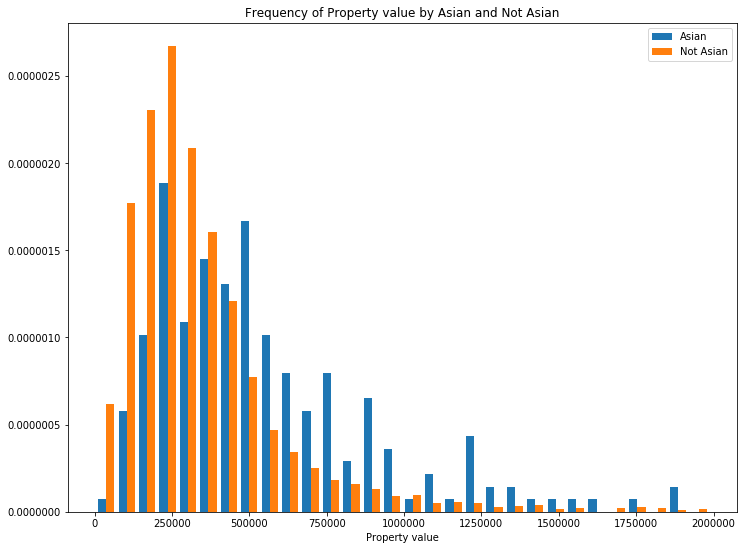

In [15]:
focus = df[df.property_value < 2000000]
plt.hist([
    focus[focus.derived_race == "Asian"].property_value,
    focus[focus.derived_race != "Asian"].property_value
], label=["Asian","Not Asian"], bins=30, density=True)
plt.xlabel( 'Property value' )
plt.title( 'Frequency of Property value by Asian and Not Asian' )
plt.legend()
plt.show()

We computed the means of the distributions of the two populations (Asian and Not Asian). 

In [16]:
Asian = (df.derived_race == "Asian")
asian_value = df.loc[Asian, "property_value"]
asian_value.describe()

count    2.130000e+02
mean     5.856103e+05
std      4.397245e+05
min      6.500000e+04
25%      2.850000e+05
50%      4.750000e+05
75%      7.350000e+05
max      2.835000e+06
Name: property_value, dtype: float64

In [17]:
Not_Asian = (df.derived_race != "Asian")
not_asian_value = df.loc[Not_Asian, "property_value"]
not_asian_value.describe()

count    3.293000e+03
mean     3.559687e+05
std      3.399143e+05
min      5.000000e+03
25%      1.750000e+05
50%      2.750000e+05
75%      4.250000e+05
max      4.805000e+06
Name: property_value, dtype: float64

We performed a hypothesis test for the difference of two means to determine whether those two means are statistically significantly different. We did a two-sided t-test, the confidence level we used is 5%. We assume the two samples do not have equal variance. 

In [18]:
alpha = 0.05
sample1 = list(asian_value.dropna())
sample2 = list(not_asian_value.dropna())
t_statistics, p_value = stats.ttest_ind( sample1, sample2, equal_var = False )
reject_H_0 = p_value < alpha
alpha, p_value, reject_H_0

(0.05, 1.5952616639501726e-12, True)

Finally, the python file is saved to a pickle file, containing the cleaned dataset. 

In [19]:
df.to_pickle('project-1-dataset_clean_Shiyu_Jihui.pkl')